In [87]:
# import all necessary model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk 
import string
import re
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [88]:
!pip install openpyxl

In [89]:
data = pd.read_excel('depressed.xlsx')

In [90]:
data

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id
0,2021-10-03 23:00:33,Michelle Obama,409486555,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",How it started vs. how it’s going\n\nHappy ann...,NaN,NaN,23025,1444693864275709958
1,2021-10-04 07:24:12,BrooklynDad_Defiant!,1640929196,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",Who else would LOVE to see the media relentles...,NaN,NaN,8552,1444820612988522496
2,2021-10-05 08:43:45,SMTOWN,884378714,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",TAEIL of NCT & rapper Lil Boi to feature in Ra...,NaN,NaN,15586,1445203019553861633
3,2021-10-05 10:39:36,???? ????????xy ⁷,1045314656863023112,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...",RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...,NaN,NaN,10785,1445232173934469125
4,2021-10-05 10:39:35,Amanda Evans,1248046770682290178,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",RT @AdamsCumbie: I love this! ?????? https://t...,NaN,NaN,100,1445232173095731204
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2021-10-03 23:00:00,Decadent Publishing,142780741,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Will Tiffany and Charles be able to save their...,NaN,NaN,1,1444693726681575425
1987,2021-10-03 23:00:00,Terese McGroarty,22322884,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...",RT @JoelOsteen: I love the fact that Jesus bro...,NaN,NaN,1873,1444693726677372941
1988,2021-10-03 23:00:00,ACT:⁵Acehilnr_?? |??STREAM??,1379126745815654403,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",RT @joe_txtmoa: Bighit is no longer holding ba...,NaN,NaN,558,1444693726673072134
1989,2021-10-03 23:00:00,?? ?? ??,1017947223164882944,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...",love love love ?? https://t.co/bdULnKntMC,NaN,NaN,0,1444693726643822597


## Exploratory Data Anaysis: EDA

In [92]:
# Drop unrelated columns
data = data.drop(['Created-At','Id','From-User', 'From-User-Id', 'Language', 'To-User', 'To-User-Id', 'Source', 'Geo-Location-Latitude', 'Geo-Location-Longitude','Retweet-Count'], axis=1)

In [93]:
data.head()

,Text
0,How it started vs. how it’s going\n\nHappy ann...
1,Who else would LOVE to see the media relentles...
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...
4,RT @AdamsCumbie: I love this! ?????? https://t...


In [94]:
print('Data size: ', data.shape)
print('Columns: ', data.columns)

Data size:  (1991, 1)
Columns:  Index(['Text'], dtype='object')


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1991 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


## Data Preprocessing

In [96]:
# Find and drop duplicated data
data.Text.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1986    False
1987    False
1988     True
1989    False
1990    False
Name: Text, Length: 1991, dtype: bool

In [97]:
data.Text.duplicated().sum()

425

In [98]:
(~data.Text.duplicated()).sum()

1566

In [99]:
data.drop_duplicates(inplace=True, subset='Text', keep='last')

In [100]:
data

,Text
0,How it started vs. how it’s going\n\nHappy ann...
1,Who else would LOVE to see the media relentles...
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...
4,RT @AdamsCumbie: I love this! ?????? https://t...
...,...
1986,Will Tiffany and Charles be able to save their...
1987,RT @JoelOsteen: I love the fact that Jesus bro...
1988,RT @joe_txtmoa: Bighit is no longer holding ba...
1989,love love love ?? https://t.co/bdULnKntMC


In [101]:
data.reset_index(drop=True,inplace=True)

In [102]:
list1 = []

for i in data.loc[:,'Text']:
  t1 = " ".join(filter(lambda x:x[0]!= '@', i.split()))
  t2 = " ".join(filter(lambda x:x[0]!= '#', t1.split()))
  t3 = re.sub(r"http\S+", "", t2)
  t4 = t3.replace('RT','')
  text = " ".join(t4.split())
  list1.append(text)
  

In [103]:
list1

['How it started vs. how it’s going Happy anniversary, Barack—love you! ❤️??',
 'Who else would LOVE to see the media relentlessly questioning Sen. Manchin and Sen. Sinema about their Oil and Pharma donors? ??️',
 'TAEIL of NCT & rapper Lil Boi to feature in Raiden’s new song ‘Love Right Back’ out on 10/11 6PM KST! To present a sentimental synergy!',
 'All of Hot 100 Dynamite Savage Love (Laxed - Siren Beat) with & Life Goes On Butter…',
 'I love this! ??????',
 'I always love how Sydney politicians bash Canberra as a way to get people to vote for them to come here. If you hate Canberra, stay out of Federal politics and run for NSW state government.',
 'Sets Personal Record As "CRAZY IN LOVE" Debuts At No. 11 On Billboard 200',
 'Derwin waving the Raiders fans goodbye, we love to see it. ??',
 'I love watching Derwin James, dude is a dawg!',
 "hello !! im goldy n today's my birthday /o\\ thanks so much for all the love & support! i'd like to host a small raffle…",
 'OMG RUBY i love thi

In [104]:
print(type(text))

<class 'str'>


In [105]:
df = pd.DataFrame(list1)

In [106]:
df

,0
0,How it started vs. how it’s going Happy annive...
1,Who else would LOVE to see the media relentles...
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...
3,All of Hot 100 Dynamite Savage Love (Laxed - S...
4,I love this! ??????
...,...
1561,Will Tiffany and Charles be able to save their...
1562,I love the fact that Jesus broke the rules to ...
1563,Bighit is no longer holding back!!! Theyre fla...
1564,love love love ??


In [107]:
data

,Text
0,How it started vs. how it’s going\n\nHappy ann...
1,Who else would LOVE to see the media relentles...
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...
4,RT @AdamsCumbie: I love this! ?????? https://t...
...,...
1561,Will Tiffany and Charles be able to save their...
1562,RT @JoelOsteen: I love the fact that Jesus bro...
1563,RT @joe_txtmoa: Bighit is no longer holding ba...
1564,love love love ?? https://t.co/bdULnKntMC


In [108]:
dataframe = pd.concat([data, df], ignore_index= True, axis= 1)


In [109]:
dataframe[1]

0       How it started vs. how it’s going Happy annive...
1       Who else would LOVE to see the media relentles...
2       TAEIL of NCT & rapper Lil Boi to feature in Ra...
3       All of Hot 100 Dynamite Savage Love (Laxed - S...
4                                     I love this! ??????
                              ...                        
1561    Will Tiffany and Charles be able to save their...
1562    I love the fact that Jesus broke the rules to ...
1563    Bighit is no longer holding back!!! Theyre fla...
1564                                    love love love ??
1565    Happy birthday to the most beautiful man I hav...
Name: 1, Length: 1566, dtype: object

In [110]:
dataframe.rename(columns={0: 'text', 1: 'text_clean'}, inplace= True)

In [111]:
dataframe['text_clean']

0       How it started vs. how it’s going Happy annive...
1       Who else would LOVE to see the media relentles...
2       TAEIL of NCT & rapper Lil Boi to feature in Ra...
3       All of Hot 100 Dynamite Savage Love (Laxed - S...
4                                     I love this! ??????
                              ...                        
1561    Will Tiffany and Charles be able to save their...
1562    I love the fact that Jesus broke the rules to ...
1563    Bighit is no longer holding back!!! Theyre fla...
1564                                    love love love ??
1565    Happy birthday to the most beautiful man I hav...
Name: text_clean, Length: 1566, dtype: object

In [112]:
dataframe['text_clean'].str.extractall(r'(\#\w+)')[0].value_counts()

#Likee                   1
#EmmaRose                1
#glutenfree              1
#Chihuly                 1
#ForceFactor             1
#JOSHUA                  1
#GirlsPlanet999          1
#lovemeharder            1
#HappyOctoberBirthday    1
Name: 0, dtype: int64

#### Remove punctuations

In [113]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [114]:
def drop_punctuation(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    
    return text

In [115]:
dataframe['Text_punct'] = dataframe['text_clean'].apply(lambda i: drop_punctuation(i))
dataframe.head()

,text,text_clean,Text_punct
0,How it started vs. how it’s going\n\nHappy ann...,How it started vs. how it’s going Happy annive...,How it started vs how it’s going Happy anniver...
1,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT rapper Lil Boi to feature in Rai...
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...,All of Hot 100 Dynamite Savage Love (Laxed - S...,All of Hot Dynamite Savage Love Laxed Siren ...
4,RT @AdamsCumbie: I love this! ?????? https://t...,I love this! ??????,I love this


#### Tokenization - Converting a sentence into list of words

In [116]:
def token(text):
    text = re.split('\W+', text)
    return text

In [117]:
dataframe['Text_token'] = dataframe['Text_punct'].apply(lambda i: token(i.lower()))
dataframe.head()

,text,text_clean,Text_punct,Text_token
0,How it started vs. how it’s going\n\nHappy ann...,How it started vs. how it’s going Happy annive...,How it started vs how it’s going Happy anniver...,"[how, it, started, vs, how, it, s, going, happ..."
1,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,"[who, else, would, love, to, see, the, media, ..."
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT rapper Lil Boi to feature in Rai...,"[taeil, of, nct, rapper, lil, boi, to, feature..."
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...,All of Hot 100 Dynamite Savage Love (Laxed - S...,All of Hot Dynamite Savage Love Laxed Siren ...,"[all, of, hot, dynamite, savage, love, laxed, ..."
4,RT @AdamsCumbie: I love this! ?????? https://t...,I love this! ??????,I love this,"[i, love, this, ]"


#### Remove stopwords

In [118]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [119]:
stopword = nltk.corpus.stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [120]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [121]:
dataframe['Text_stopword'] = dataframe['Text_token'].apply(lambda i: remove_stopwords(i))
dataframe.head()

,text,text_clean,Text_punct,Text_token,Text_stopword
0,How it started vs. how it’s going\n\nHappy ann...,How it started vs. how it’s going Happy annive...,How it started vs how it’s going Happy anniver...,"[how, it, started, vs, how, it, s, going, happ...","[started, vs, going, happy, anniversary, barac..."
1,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,"[who, else, would, love, to, see, the, media, ...","[else, would, love, see, media, relentlessly, ..."
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT rapper Lil Boi to feature in Rai...,"[taeil, of, nct, rapper, lil, boi, to, feature...","[taeil, nct, rapper, lil, boi, feature, raiden..."
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...,All of Hot 100 Dynamite Savage Love (Laxed - S...,All of Hot Dynamite Savage Love Laxed Siren ...,"[all, of, hot, dynamite, savage, love, laxed, ...","[hot, dynamite, savage, love, laxed, siren, be..."
4,RT @AdamsCumbie: I love this! ?????? https://t...,I love this! ??????,I love this,"[i, love, this, ]","[love, ]"


#### Lammatization/ Stemming - Tranforming any form of a word to its root word

In [122]:
poster = nltk.PorterStemmer()

In [123]:
def stemming(text):
    text = [poster.stem(word) for word in text]
    return text

In [124]:
dataframe['Text_stemming'] = dataframe['Text_stopword'].apply(lambda i: stemming(i))
dataframe.head()

,text,text_clean,Text_punct,Text_token,Text_stopword,Text_stemming
0,How it started vs. how it’s going\n\nHappy ann...,How it started vs. how it’s going Happy annive...,How it started vs how it’s going Happy anniver...,"[how, it, started, vs, how, it, s, going, happ...","[started, vs, going, happy, anniversary, barac...","[start, vs, go, happi, anniversari, barack, lo..."
1,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,"[who, else, would, love, to, see, the, media, ...","[else, would, love, see, media, relentlessly, ...","[els, would, love, see, media, relentlessli, q..."
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT rapper Lil Boi to feature in Rai...,"[taeil, of, nct, rapper, lil, boi, to, feature...","[taeil, nct, rapper, lil, boi, feature, raiden...","[taeil, nct, rapper, lil, boi, featur, raiden,..."
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...,All of Hot 100 Dynamite Savage Love (Laxed - S...,All of Hot Dynamite Savage Love Laxed Siren ...,"[all, of, hot, dynamite, savage, love, laxed, ...","[hot, dynamite, savage, love, laxed, siren, be...","[hot, dynamit, savag, love, lax, siren, beat, ..."
4,RT @AdamsCumbie: I love this! ?????? https://t...,I love this! ??????,I love this,"[i, love, this, ]","[love, ]","[love, ]"


In [125]:
wordnet = nltk.WordNetLemmatizer()

In [126]:
def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

In [127]:
dataframe['Text_lammetization'] = dataframe['Text_stopword'].apply(lambda i: lemmatizer(i))
dataframe.head()

,text,text_clean,Text_punct,Text_token,Text_stopword,Text_stemming,Text_lammetization
0,How it started vs. how it’s going\n\nHappy ann...,How it started vs. how it’s going Happy annive...,How it started vs how it’s going Happy anniver...,"[how, it, started, vs, how, it, s, going, happ...","[started, vs, going, happy, anniversary, barac...","[start, vs, go, happi, anniversari, barack, lo...","[started, v, going, happy, anniversary, barack..."
1,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,Who else would LOVE to see the media relentles...,"[who, else, would, love, to, see, the, media, ...","[else, would, love, see, media, relentlessly, ...","[els, would, love, see, media, relentlessli, q...","[else, would, love, see, medium, relentlessly,..."
2,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT & rapper Lil Boi to feature in Ra...,TAEIL of NCT rapper Lil Boi to feature in Rai...,"[taeil, of, nct, rapper, lil, boi, to, feature...","[taeil, nct, rapper, lil, boi, feature, raiden...","[taeil, nct, rapper, lil, boi, featur, raiden,...","[taeil, nct, rapper, lil, boi, feature, raiden..."
3,RT @chartdata: All of @BTS_twt's Hot 100 #1’s:...,All of Hot 100 Dynamite Savage Love (Laxed - S...,All of Hot Dynamite Savage Love Laxed Siren ...,"[all, of, hot, dynamite, savage, love, laxed, ...","[hot, dynamite, savage, love, laxed, siren, be...","[hot, dynamit, savag, love, lax, siren, beat, ...","[hot, dynamite, savage, love, laxed, siren, be..."
4,RT @AdamsCumbie: I love this! ?????? https://t...,I love this! ??????,I love this,"[i, love, this, ]","[love, ]","[love, ]","[love, ]"


In [128]:
def removewhitespace(text):
    text = [word for word in text]
    
    return text

In [129]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text = re.sub('[0-9]+', '', text)
    text = re.split('\W+', text)    # tokenization
    text = [poster.stem(word) for word in text if word not in stopword]  # remove stopwords and stemming
    text = [wordnet.lemmatize(word) for word in text] #lemmatizer
    return text

In [130]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(dataframe['Text_lammetization'])
print('{} Number of Text has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1566 Number of Text has 1425 words


In [131]:
dataframe.tail()

,text,text_clean,Text_punct,Text_token,Text_stopword,Text_stemming,Text_lammetization
1561,Will Tiffany and Charles be able to save their...,Will Tiffany and Charles be able to save their...,Will Tiffany and Charles be able to save their...,"[will, tiffany, and, charles, be, able, to, sa...","[tiffany, charles, able, save, love, lose, ete...","[tiffani, charl, abl, save, love, lose, etern,...","[tiffany, charles, able, save, love, lose, ete..."
1562,RT @JoelOsteen: I love the fact that Jesus bro...,I love the fact that Jesus broke the rules to ...,I love the fact that Jesus broke the rules to ...,"[i, love, the, fact, that, jesus, broke, the, ...","[love, fact, jesus, broke, rules, reach, peopl...","[love, fact, jesu, broke, rule, reach, peopl, ...","[love, fact, jesus, broke, rule, reach, people..."
1563,RT @joe_txtmoa: Bighit is no longer holding ba...,Bighit is no longer holding back!!! Theyre fla...,Bighit is no longer holding back Theyre flaunt...,"[bighit, is, no, longer, holding, back, theyre...","[bighit, longer, holding, back, theyre, flaunt...","[bighit, longer, hold, back, theyr, flaunt, fl...","[bighit, longer, holding, back, theyre, flaunt..."
1564,love love love ?? https://t.co/bdULnKntMC,love love love ??,love love love,"[love, love, love, ]","[love, love, love, ]","[love, love, love, ]","[love, love, love, ]"
1565,Happy birthday to the most beautiful man I hav...,Happy birthday to the most beautiful man I hav...,Happy birthday to the most beautiful man I hav...,"[happy, birthday, to, the, most, beautiful, ma...","[happy, birthday, beautiful, man, ever, seen, ...","[happi, birthday, beauti, man, ever, seen, ins...","[happy, birthday, beautiful, man, ever, seen, ..."


In [132]:
dataframe.shape

(1566, 7)

In [178]:
# datafram.to_csv('df_final3.csv', encoding="utf-8-sig")

### Labelled dataset

In [140]:
df = pd.read_csv("depression_dataset2.csv", encoding='cp1252')
df.head()

,text,text_clean,Text_punct,Text_token,Text_stopword,Text_stemming,Text_lammetization,target,class
0,Ten years ago today I defended my dissertation...,Ten years ago today I defended my dissertation...,Ten years ago today I defended my dissertation...,"['ten', 'years', 'ago', 'today', 'i', 'defende...","['ten', 'years', 'ago', 'today', 'defended', '...","['ten', 'year', 'ago', 'today', 'defend', 'dis...","['ten', 'year', 'ago', 'today', 'defended', 'd...",-1,non-depressed
1,@BlushAndBurbon Yay! I'm glad you enjoyed it. ...,Yay! I'm glad you enjoyed it. ?? It's been dif...,Yay Im glad you enjoyed it Its been difficult ...,"['yay', 'im', 'glad', 'you', 'enjoyed', 'it', ...","['yay', 'im', 'glad', 'enjoyed', 'difficult', ...","['yay', 'im', 'glad', 'enjoy', 'difficult', 'f...","['yay', 'im', 'glad', 'enjoyed', 'difficult', ...",-1,non-depressed
2,There’s a new American Hysteria and it’s about...,There’s a new American Hysteria and it’s about...,There’s a new American Hysteria and it’s about...,"['there', 's', 'a', 'new', 'american', 'hyster...","['new', 'american', 'hysteria', 'elsagate', 'a...","['new', 'american', 'hysteria', 'elsag', 'amou...","['new', 'american', 'hysteria', 'elsagate', 'a...",-1,non-depressed
3,RT @TZulfahmi3: @xmemwallet Great projects sir...,Great projects sir glad to join. It will be su...,Great projects sir glad to join It will be suc...,"['great', 'projects', 'sir', 'glad', 'to', 'jo...","['great', 'projects', 'sir', 'glad', 'join', '...","['great', 'project', 'sir', 'glad', 'join', 's...","['great', 'project', 'sir', 'glad', 'join', 's...",-1,non-depressed
4,RT @epiphanyyxv: You can miss a person everyda...,You can miss a person everyday and still be gl...,You can miss a person everyday and still be gl...,"['you', 'can', 'miss', 'a', 'person', 'everyda...","['miss', 'person', 'everyday', 'still', 'glad'...","['miss', 'person', 'everyday', 'still', 'glad'...","['miss', 'person', 'everyday', 'still', 'glad'...",-1,non-depressed


Text(0.5, 1.0, 'Target variable distribution in the Dataset')

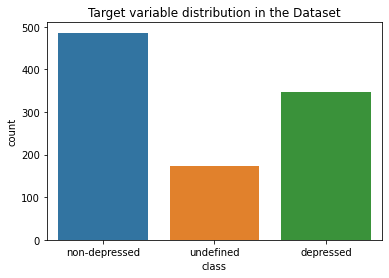

In [141]:
g = sns.countplot(x='class', data=df)
g.set_title('Target variable distribution in the Dataset')

In [142]:
#conda install -c conda-forge wordcloud=1.6.0 

In [143]:
data_depress = df[df['class'] == 'depressed']
data_non_depress = df[df['class'] == 'non-depressed']
data_undefine = df[df['class'] == 'undefined']

In [144]:
data_depress.head()

,text,text_clean,Text_punct,Text_token,Text_stopword,Text_stemming,Text_lammetization,target,class
659,RT @spoogyoogie: got depressed so i drew demon...,got depressed so i drew demons,got depressed so i drew demons,"['got', 'depressed', 'so', 'i', 'drew', 'demons']","['got', 'depressed', 'drew', 'demons']","['got', 'depress', 'drew', 'demon']","['got', 'depressed', 'drew', 'demon']",1,depressed
660,"@mikearm71 No, just depressed. Each score and ...","No, just depressed. Each score and defensive s...",No just depressed Each score and defensive sta...,"['no', 'just', 'depressed', 'each', 'score', '...","['depressed', 'score', 'defensive', 'stand', '...","['depress', 'score', 'defens', 'stand', 'like'...","['depressed', 'score', 'defensive', 'stand', '...",1,depressed
661,I don’t know maybe just need do ??meth like fa...,I don’t know maybe just need do ??meth like fa...,I don’t know maybe just need do meth like fat ...,"['i', 'don', 't', 'know', 'maybe', 'just', 'ne...","['know', 'maybe', 'need', 'meth', 'like', 'fat...","['know', 'mayb', 'need', 'meth', 'like', 'fat'...","['know', 'maybe', 'need', 'meth', 'like', 'fat...",1,depressed
662,"In a weird place. Not really depressed, just u...","In a weird place. Not really depressed, just u...",In a weird place Not really depressed just uns...,"['in', 'a', 'weird', 'place', 'not', 'really',...","['weird', 'place', 'really', 'depressed', 'uns...","['weird', 'place', 'realli', 'depress', 'unset...","['weird', 'place', 'really', 'depressed', 'uns...",1,depressed
663,"I'm incredibly depressed right now, I just wan...","I'm incredibly depressed right now, I just wan...",Im incredibly depressed right now I just want ...,"['im', 'incredibly', 'depressed', 'right', 'no...","['im', 'incredibly', 'depressed', 'right', 'wa...","['im', 'incred', 'depress', 'right', 'want', '...","['im', 'incredibly', 'depressed', 'right', 'wa...",1,depressed


#### Wordcloud Visualization 

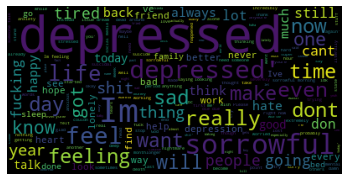

In [145]:
text1 = data_depress['Text_punct'].values

wordcloud = WordCloud().generate(str(text1))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

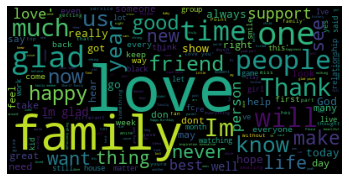

In [146]:
text3 = data_non_depress['Text_punct'].values

wordcloud = WordCloud().generate(str(text3))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

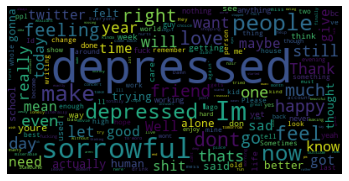

In [147]:
text2 = data_undefine['Text_punct'].values

wordcloud = WordCloud().generate(str(text2))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

In [148]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,text,text_clean,Text_punct,Text_token,Text_stopword,Text_stemming,Text_lammetization,target,class
0,I have a feeling soon news will come Aryan kha...,I have a feeling soon news will come Aryan kha...,I have a feeling soon news will come Aryan kha...,"['i', 'have', 'a', 'feeling', 'soon', 'news', ...","['feeling', 'soon', 'news', 'come', 'aryan', '...","['feel', 'soon', 'news', 'come', 'aryan', 'kha...","['feeling', 'soon', 'news', 'come', 'aryan', '...",-1,non-depressed
1,I wish i could just die die die die die die di...,I wish i could just die die die die die die di...,I wish i could just die die die die die die di...,"['i', 'wish', 'i', 'could', 'just', 'die', 'di...","['wish', 'could', 'die', 'die', 'die', 'die', ...","['wish', 'could', 'die', 'die', 'die', 'die', ...","['wish', 'could', 'die', 'die', 'die', 'die', ...",1,depressed
2,she's so crazzzzzyyyyyy i love her /s https://...,she's so crazzzzzyyyyyy i love her /s,shes so crazzzzzyyyyyy i love her s,"['shes', 'so', 'crazzzzzyyyyyy', 'i', 'love', ...","['shes', 'crazzzzzyyyyyy', 'love']","['she', 'crazzzzzyyyyyy', 'love']","['shes', 'crazzzzzyyyyyy', 'love']",-1,non-depressed
3,@englishfess_ Today I really cut my hair short...,Today I really cut my hair short like a boy. I...,Today I really cut my hair short like a boy I ...,"['today', 'i', 'really', 'cut', 'my', 'hair', ...","['today', 'really', 'cut', 'hair', 'short', 'l...","['today', 'realli', 'cut', 'hair', 'short', 'l...","['today', 'really', 'cut', 'hair', 'short', 'l...",1,depressed
4,Depressed but well dressed,Depressed but well dressed,Depressed but well dressed,"['depressed', 'but', 'well', 'dressed']","['depressed', 'well', 'dressed']","['depress', 'well', 'dress']","['depressed', 'well', 'dressed']",1,depressed


In [149]:
X = df['Text_lammetization']
Y = df['target']

In [150]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05, random_state=1)

### Transforming Dataset using TF-IDF Vectorizer

In [151]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)

In [152]:
vectorizer.fit(x_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  12936


In [153]:
x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

### Model

In [154]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

In [169]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred2)}")
print(f"Confusion matrix:\n {metrics.confusion_matrix(y_test, y_pred2)}")
print(metrics.classification_report(y_test, y_pred2))

Accuracy = 0.7843137254901961
Confusion matrix:
 [[23  0  1]
 [ 3  0  5]
 [ 2  0 17]]
              precision    recall  f1-score   support

          -1       0.82      0.96      0.88        24
           0       0.00      0.00      0.00         8
           1       0.74      0.89      0.81        19

    accuracy                           0.78        51
   macro avg       0.52      0.62      0.56        51
weighted avg       0.66      0.78      0.72        51



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


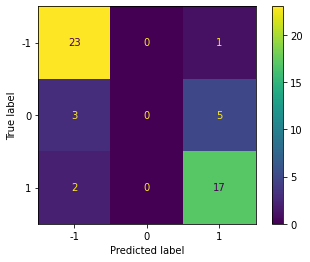

In [179]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(mnb, x_test, y_test)

In [156]:
# cross validation
mnb_score = cross_val_score(mnb, x_train, y_train, cv=10)
mnb_score


array([0.77083333, 0.73958333, 0.73958333, 0.78125   , 0.77894737,
       0.74736842, 0.76842105, 0.78947368, 0.71578947, 0.71578947])

### Tunning Hyperparameter

In [157]:
# transform predictor to vector
x_vec = vectorizer.transform(X)

In [158]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(mnb, param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(x_vec,Y)

print('Train Accuracy : ', multinomial_nb_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : ', multinomial_nb_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : ', multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Accuracy :  0.9790356394129979
Test Accuracy :  0.8823529411764706
Best Accuracy Through Grid Search :  0.7681592039800995
Best Parameters :  {'alpha': 0.5}


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished
